# Lab | Random variable distributions

## Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import functions_WIP as functions
from hackyou import hackpy as hp
import matplotlib.pyplot as plt
%matplotlib inline

## Reading the file

In [2]:
file = pd.read_csv('/Users/Hector_Martin/Documents/Labs/lab-random-variable-distributions/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
file.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## Get the numerical variables from our dataset.

In [3]:
data_num = file.select_dtypes(['number'])
data_num.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


## Check using a distribution plot if the variables fit the theoretical normal or exponential distribution and check if any of the transformations  we have seen up to this point changes the result.

For this exercise we will use the Standard Scaler, MinMax Scaler and Power Transformer, then we will compare how the distribution looks after applying each transformer and without applying none. I believe that the Power Transformer will offer the best results to normalize the distribution.

### Standard Scaler:

In [4]:
from sklearn.preprocessing import StandardScaler

stdscaler = StandardScaler().fit(data_num)
x_standardized = stdscaler.transform(data_num)
x_standardized =pd.DataFrame(x_standardized, columns= data_num.columns)
display(x_standardized)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.422250,-0.822648,-0.169640
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.422250,2.106160,2.400737
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.422250,-0.404247,0.455734
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.422250,1.687759,0.329769
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648,-1.018843
...,...,...,...,...,...,...,...,...
9129,2.241590,1.128558,-0.587666,0.288205,1.466984,-0.422250,-0.404247,-0.811934
9130,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648,-0.188956
9131,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,2.873245,-0.404247,1.227937
9132,-0.069935,-0.517356,0.080820,1.876656,-1.614960,-0.422250,0.014154,0.885113


### MinMax Scaler:

In [5]:
from sklearn.preprocessing import MinMaxScaler

minmaxscaler = MinMaxScaler().fit(data_num)
x_normalized = minmaxscaler.transform(data_num)
print(x_normalized.shape)
x_normalized
x_normalized=pd.DataFrame(x_normalized, columns=data_num.columns)
display(x_normalized)

(9134, 8)


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710
...,...,...,...,...,...,...,...,...
9129,0.264137,0.719547,0.050633,0.514286,0.898990,0.0,0.125,0.068485
9130,0.014719,0.216081,0.075949,0.400000,0.282828,0.0,0.000,0.131034
9131,0.076951,0.000000,0.101266,0.257143,0.373737,0.6,0.125,0.273297
9132,0.069098,0.219452,0.147679,0.971429,0.030303,0.0,0.250,0.238876


### Power Transformer:

In [6]:
from sklearn.preprocessing import PowerTransformer
powertrans = PowerTransformer()
powertrans.fit(data_num)
x_ptransformed = powertrans.transform(data_num)
x_ptransformed = pd.DataFrame(x_ptransformed, columns = data_num.columns)
x_ptransformed.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,-1.394947,0.691719,-0.850901,1.464556,-1.716791,-0.509289,-1.145850,0.006373
1,0.271651,-1.641026,0.433173,-0.040371,-0.113063,-0.509289,1.577821,1.988152
2,1.114847,0.596805,0.847014,0.416410,-0.255772,-0.509289,-0.058430,0.604891
3,0.408620,-1.641026,0.796044,0.416410,0.644648,-0.509289,1.464360,0.493624
4,-1.357236,0.528534,-0.572139,-0.140125,-0.043160,-0.509289,-1.145850,-1.141342


### Renaming the columns of the Dataframes:

In [7]:
x_standardized = x_standardized.rename(columns={'Customer Lifetime Value':'Customer Lifetime Value_std',
    'Income':'Income_std',                              
    'Monthly Premium Auto': 'Monthly Premium Auto_std',
    'Months Since Last Claims': 'Months Since Last Claims_std',
    'Months Since Policy Inception': 'Months Since Policy Inception_std',
    'Number of Open Complaints': 'Number of Open Complaints_std',
    'Number of Policies': 'Number of Policies_std',
    'Total Claim Amount':'Total Claim Amount_std'})

In [8]:
x_normalized = x_normalized.rename(columns={
    'Customer Lifetime Value':'Customer Lifetime Value_norm',
    'Income':'Income_norm',                              
    'Monthly Premium Auto': 'Monthly Premium Auto_norm',
    'Months Since Last Claims': 'Months Since Last Claims_norm',
    'Months Since Policy Inception': 'Months Since Policy Inception_norm',
    'Number of Open Complaints': 'Number of Open Complaints_norm',
    'Number of Policies': 'Number of Policies_norm',
    'Total Claim Amount': 'Total Claim Amount_norm'})

In [9]:
x_ptransformed = x_ptransformed.rename(columns={
    'Customer Lifetime Value':'Customer Lifetime Value_ptrans',
    'Income':'Income_ptrans',                              
    'Monthly Premium Auto': 'Monthly Premium Auto_ptrans',
    'Months Since Last Claims': 'Months Since Last Claims_ptrans',
    'Months Since Policy Inception': 'Months Since Policy Inception_ptrans',
    'Number of Open Complaints': 'Number of Open Complaints_ptrans',
    'Number of Policies': 'Number of Policies_ptrans',
    'Total Claim Amount':'Total Claim Amount_ptrans'})

### Concatenating the DataFrames:

In [10]:
comparison = pd.concat([data_num, x_standardized, x_normalized, x_ptransformed], axis =1)

In [11]:
comparison.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Customer Lifetime Value_std,Income_std,...,Number of Policies_norm,Total Claim Amount_norm,Customer Lifetime Value_ptrans,Income_ptrans,Monthly Premium Auto_ptrans,Months Since Last Claim,Months Since Policy Inception_ptrans,Number of Open Complaints_ptrans,Number of Policies_ptrans,Total Claim Amount_ptrans
0,2763.519279,56274,69,32,5,0,1,384.811147,-0.762878,0.612827,...,0.000,0.132974,-1.394947,0.691719,-0.850901,1.464556,-1.716791,-0.509289,-1.145850,0.006373
1,6979.535903,0,94,13,42,0,8,1131.464935,-0.149245,-1.239617,...,0.875,0.391051,0.271651,-1.641026,0.433173,-0.040371,-0.113063,-0.509289,1.577821,1.988152
2,12887.431650,48767,108,18,38,0,2,566.472247,0.710636,0.365710,...,0.125,0.195764,1.114847,0.596805,0.847014,0.416410,-0.255772,-0.509289,-0.058430,0.604891
3,7645.861827,0,106,18,65,0,7,529.881344,-0.052263,-1.239617,...,0.750,0.183117,0.408620,-1.641026,0.796044,0.416410,0.644648,-0.509289,1.464360,0.493624
4,2813.692575,43836,73,12,44,0,1,138.130879,-0.755575,0.203390,...,0.000,0.047710,-1.357236,0.528534,-0.572139,-0.140125,-0.043160,-0.509289,-1.145850,-1.141342


### Comparing the distributions of all the Numerical variables with and without transformations

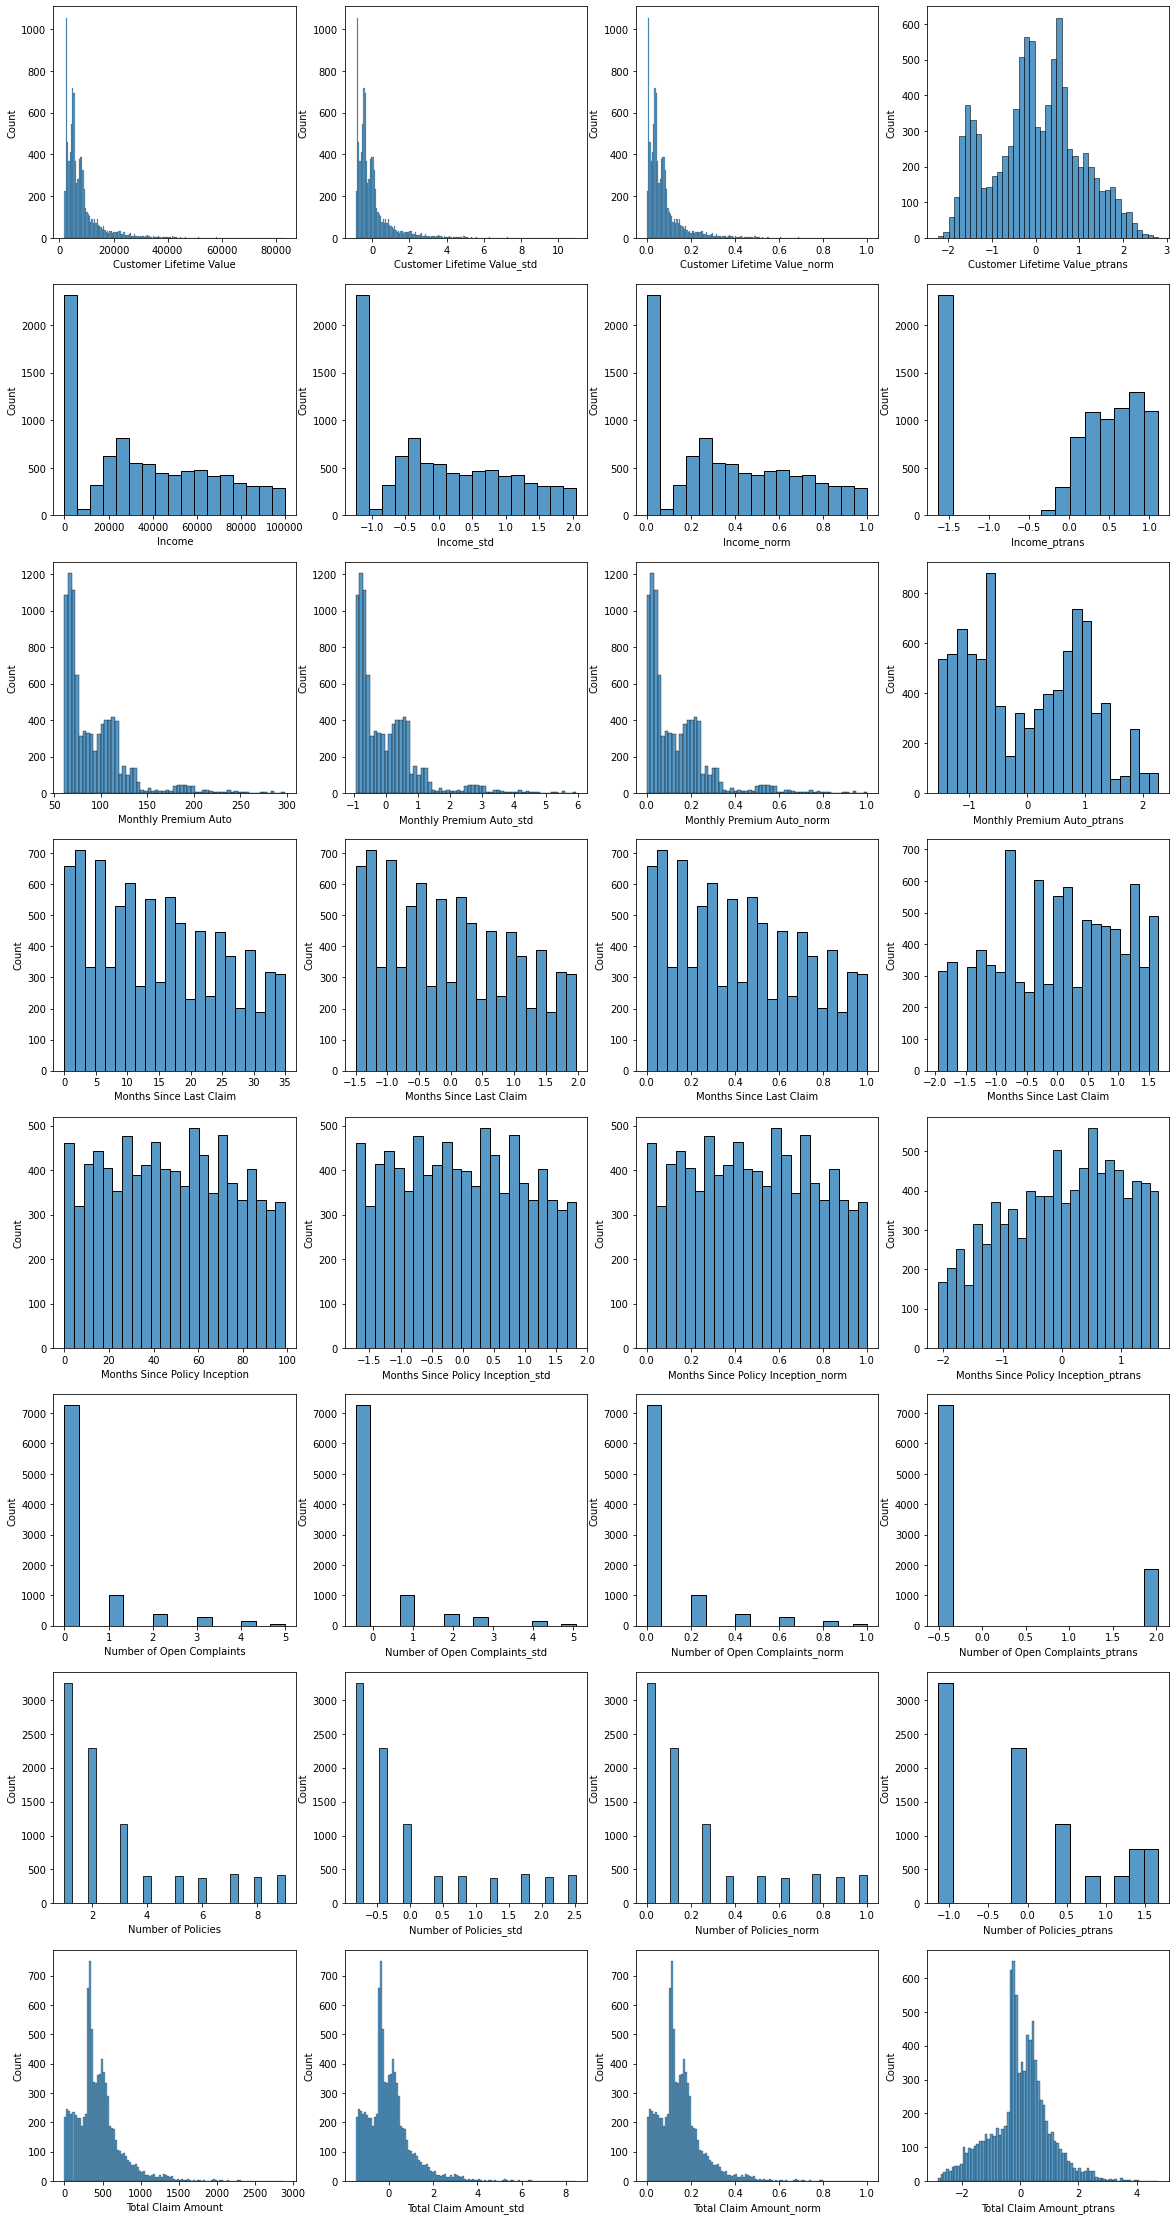

In [28]:
#Main method with 4 dataframes, one per Transformer + Original Data:
fig, axis = plt.subplots(8,4, figsize=(20,40))
    
i = 0    
for row in range(0,8):
        sns.histplot(data = data_num, x =data_num.columns[i], ax = axis[row, 0]);
        sns.histplot(data = x_standardized, x=x_standardized.columns[i], ax = axis[row, 1]);
        sns.histplot(data = x_normalized, x=x_normalized.columns[i], ax = axis[row, 2]);
        sns.histplot(data = x_ptransformed, x=x_ptransformed.columns[i], ax = axis[row, 3]);
        i+=1
     
plt.show()

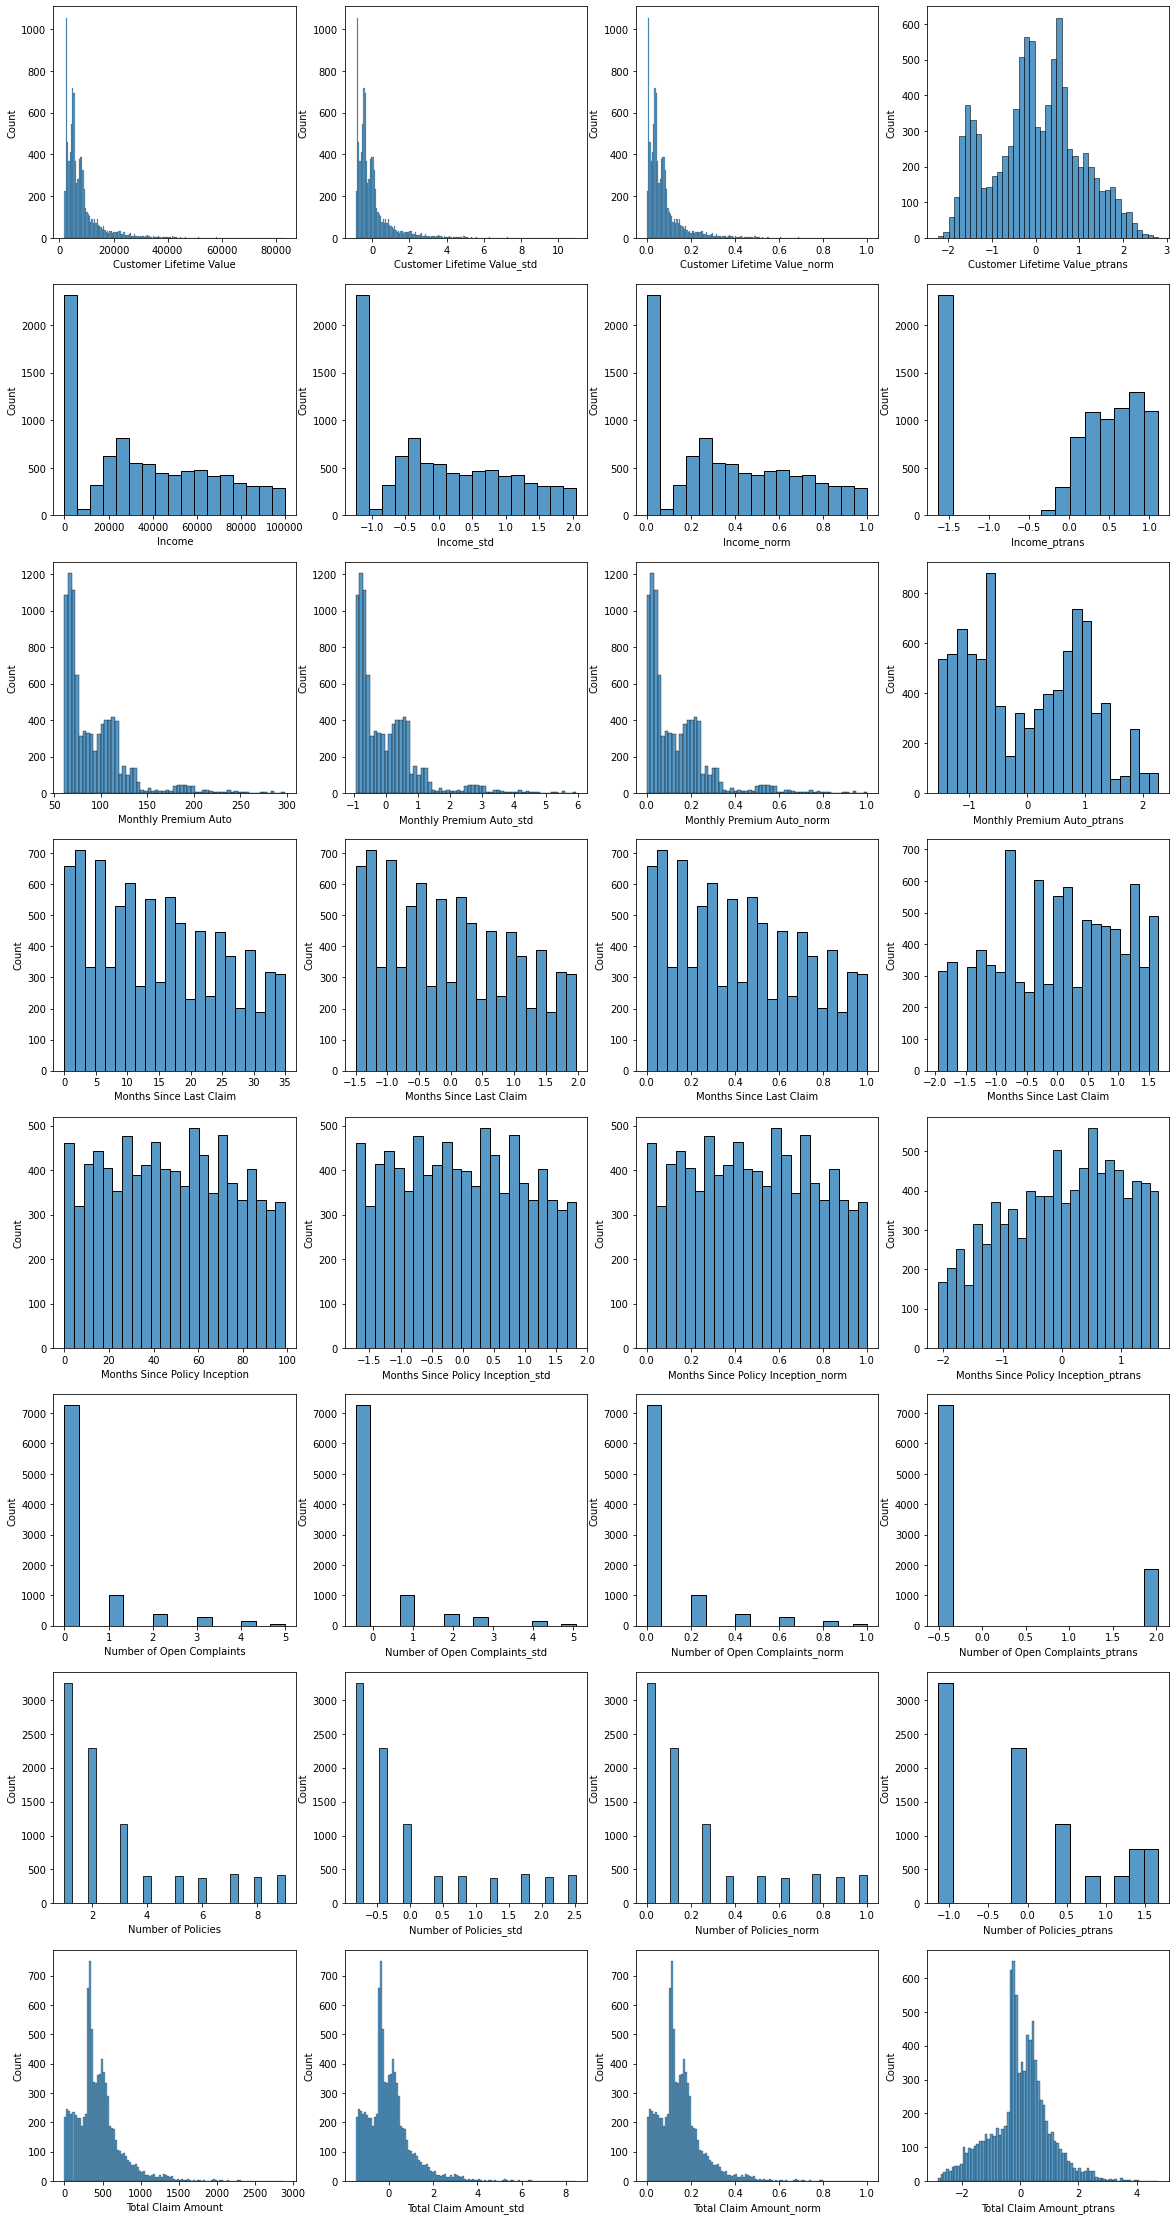

In [29]:
#Alternative method with just a single Dataframe:

num_cols = data_num.shape[1]

fig, axis = plt.subplots(num_cols,4, figsize=(20,40))    
row = 0
col = 0
for col_org in range(0,num_cols):
    col = 0 # Para cada fila reinicializar los indices de columna en al canvas.
    for salto in range(0,4):
        # 0, 8, 16, 24
        col_final = col_org + ( num_cols * salto )
        sns.histplot(x = comparison.iloc[:,col_final], ax = axis[row, col]);
        col += 1
    row += 1    
plt.show()